In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries and dataset

df = pd.read_csv('C:/Users/abhis/Downloads/Titanic-Dataset.csv')

In [2]:
#showing statistical summary of dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# shows data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cabin_known  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [5]:
# categorical distributions

df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
#identifying null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# handling null values

df['Age'] = df['Age'].fillna(df['Age'].median())

In [14]:
df['Cabin_known'] = df['Cabin'].notna().astype(int)
df = df.drop(columns=['Cabin'])

In [15]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_known    0
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


<Axes: title={'center': 'Survival Count'}, xlabel='Survived'>

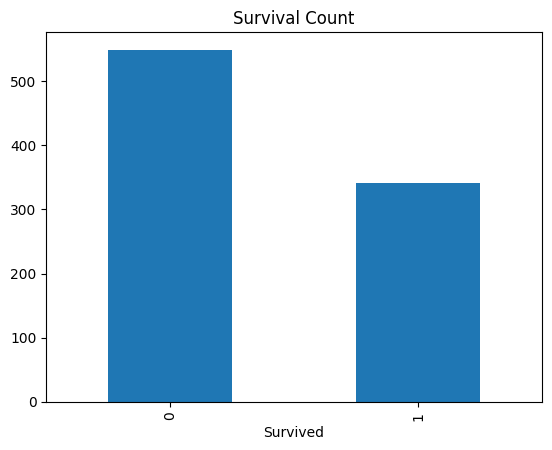

In [20]:
# survival distribution
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')

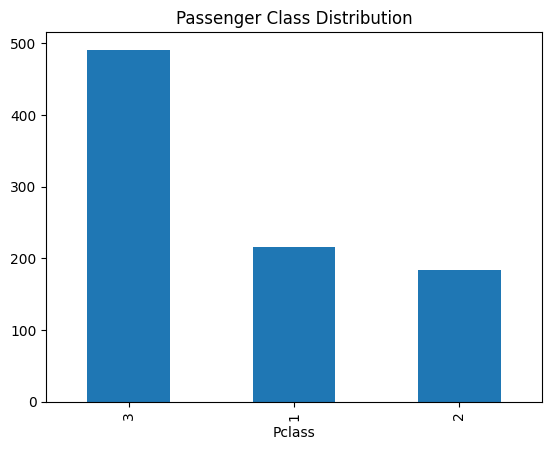

In [39]:
# passenger class distribution
df['Pclass'].value_counts().plot(kind='bar')
plt.title("Passenger Class Distribution")
plt.show()

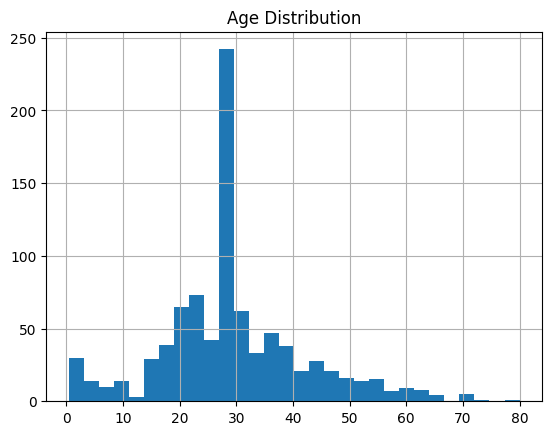

In [37]:
# age distribution
df['Age'].hist(bins=30)
plt.title("Age Distribution")
plt.show()

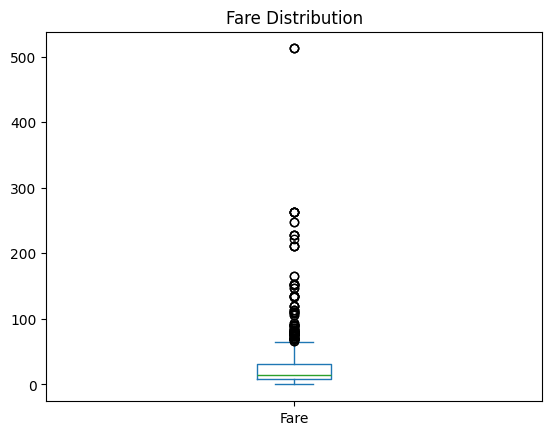

In [36]:
# fare distribution
df['Fare'].plot(kind='box')
plt.title("Fare Distribution")
plt.show()

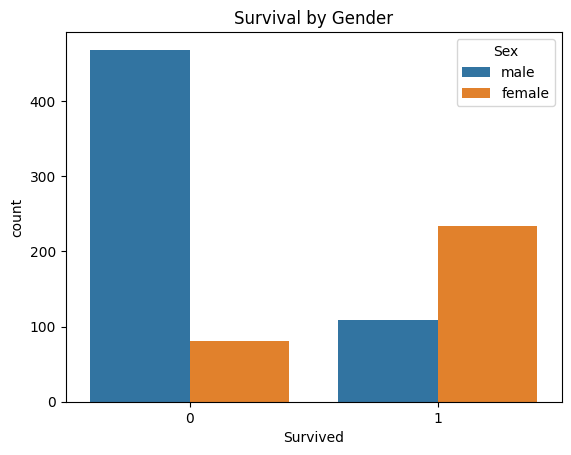

In [35]:
# survival by sex category
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

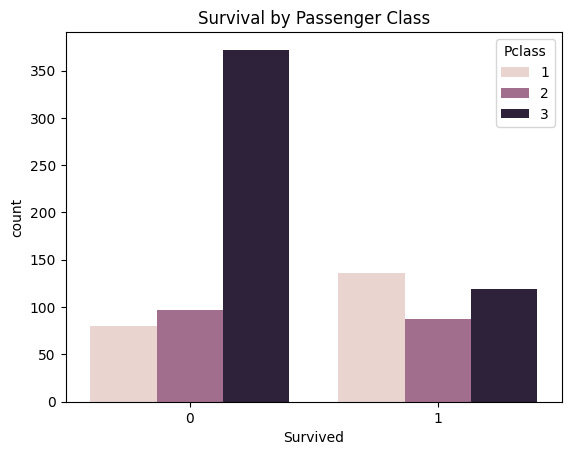

In [34]:
# survival by Pclass category
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title("Survival by Passenger Class")
plt.show()

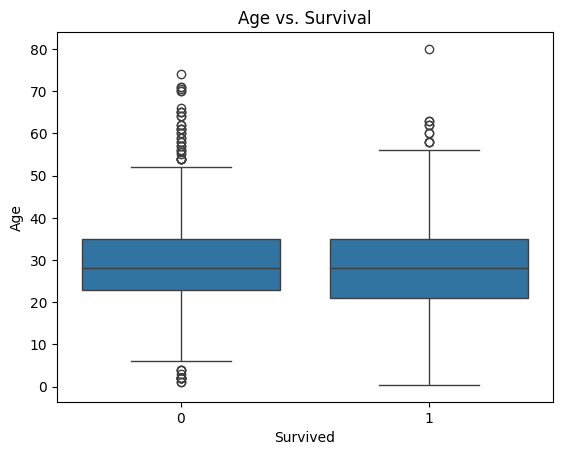

In [33]:
# age vs survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs. Survival")
plt.show()

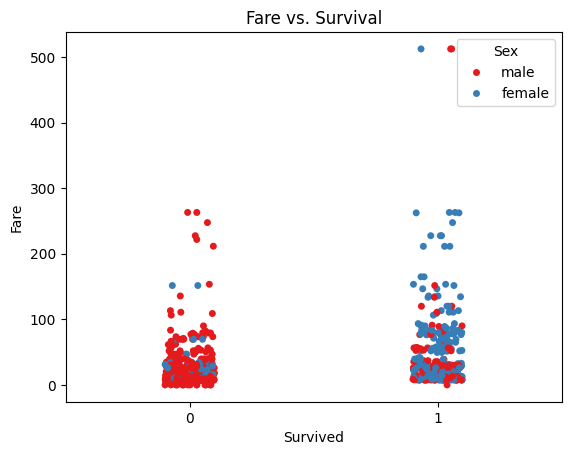

In [8]:
# fare vs survival
sns.stripplot(x='Survived', y='Fare', hue='Sex', data=df, jitter=True, palette='Set1')
plt.title("Fare vs. Survival")
plt.show()

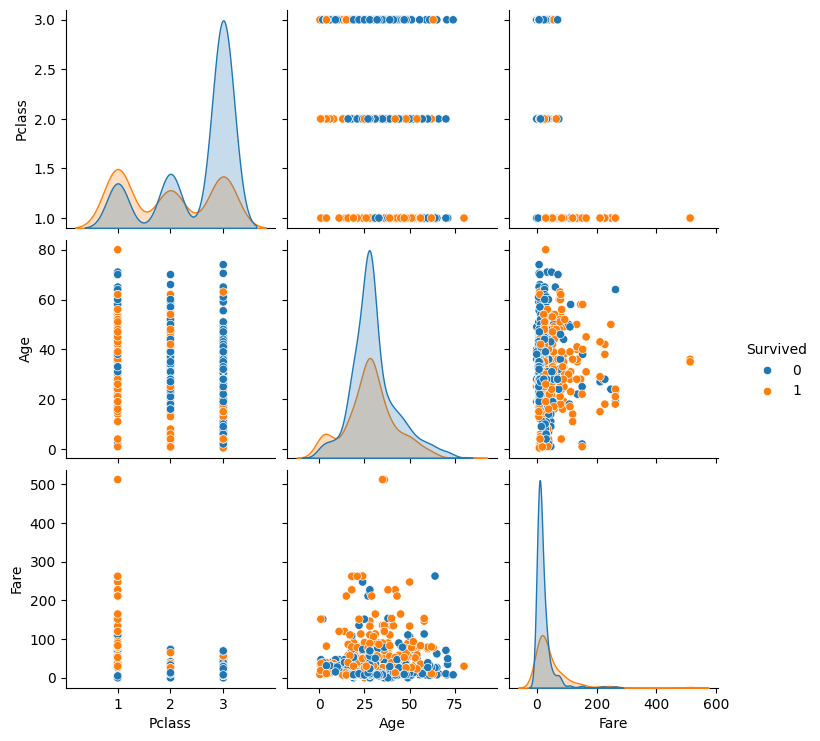

In [31]:
# pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()

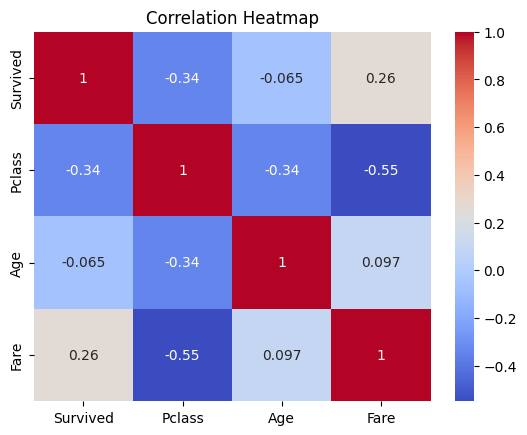

In [30]:
# heatmap
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()